# HAMILTONIAN MONTE CARLO
> **Key conceptual reference**: ["MCMC METHOD 2: Hamiltonian Monte Carlo (HMC)" from "Markov chain Monte Carlo (MCMC)" from _Sampling Methods_ from **Bayesian Inference** from `conceptual-notes`](https://github.com/pranigopu/mastersProject/blob/main/conceptual-notes/bayesian-inference/sampling-methods.md#mcmc-method-2-hamiltonian-monte-carlo-hmc)

# Algorithm and practical computation
- Initialise current sample as $\theta_0$
- Sample $m$ from $\text{Normal}(0, \sigma I)$
- Simulate $\theta_i$ and $m_i$ for some amount of time $T$
- Take $\theta_T$ as our new proposed sample
- Use the Metropolis acceptance criterion to accept or reject $\theta_T$

> **Reference**: ["11.9.3. Hamiltonian Monte Carlo" from "11.9. Inference Methods" from _11. Appendiceal Topics_ from **Bayesian Computation Notebook**](https://bayesiancomputationbook.com/markdown/chp_11.html#hamiltonian-monte-carlo)

**NOTE**: "Simulate" <br>
$\implies$ Simulate the system defined by the Hamiltonian equations <br>
$\implies$ Travelling along the contours as per the momenta

---

Why we still need to use the Metropolis acceptance criterion? Intuitively, because we can think of HMC as a Metropolis-Hasting algorithm with a better proposal method. But a further numerical justification is that the accept-reject steps help correct for errors introduced by the numerical simulation of the Hamiltonian equations.

# Python implementation
> **Source**: [_Hamiltonian Monte Carlo from scratch_ from **colindcarroll.com**](https://colindcarroll.com/2019/04/11/hamiltonian-monte-carlo-from-scratch/)

## Leapfrog integrator
> **References**:
>
> - [_Deriving the Leapfrog Integrator_ from **rnowling.github.io/math**](https://rnowling.github.io/math/2016/11/11/deriving-leapfrog.html)
> - [_Leapfrog integrator_ from **johndcook.com/blog**](https://www.johndcook.com/blog/2020/07/13/leapfrog-integrator/)

Leapfrog integration is a method for numerically integrating differential equations of the form $\frac{d^2x}{dt^2} = f(x)$, i.e. $x'' = f(x)$ (reference: [_Leapfrog integration_ from **Wikipedia**](https://en.wikipedia.org/wiki/Leapfrog_integration)). Here, $x$ is a function of $t$. In general, integrating a differential equation means solving it, i.e. finding the functions for the differentials so as to satisfy the differential equation. In the case of leapfrog integration, integrating a differential equation of the form $x'' = f(x)$ means solving for the function $x$ (note that $f$ is given). More precisely, for discrete steps along $t$, the leapfrom integrator tries to approximate the values for $x$ across for a given number of steps. Typically, $x$ is position and $t$ is time; this analogy can be extended to any use case.

### Mathematical basis
The leapfrog integrator is a numerical method for solving differential equations of the form:

$x'' = f(x)$

Here, $x$ is a function of $t$. Typically, $x$ is position and $t$ is time.

---

We use the leapfrog integrator when there is no analytical equation for $x(t)$ that satisfies the differential equation, or at least when the analytical equation is too complex to derive. The idea is to use a numerical integration algorithm to compute values of $x(t)$ on discrete time steps $\Delta t$. In the following equations, we can see how the values are approximated for $x$. Note that here, we are using the analogy (which can be accurately translated to posterior sampling) of $x$ as position, $v$ as velocity, $a$ as the acceleration and $t$ as time. For the full derivation, see: [_Deriving the Leapfrog Integrator_ from **rnowling.github.io/math**](https://rnowling.github.io/math/2016/11/11/deriving-leapfrog.html); note that I have altered the notation according to [_Leapfrog integrator_ from **johndcook.com/blog**](https://www.johndcook.com/blog/2020/07/13/leapfrog-integrator/):

- $a(t) = − f(x(t))$ (calculating $a$ for the current time step)
- $x(t + \Delta t) = x(t) + v(t)\Delta t + \frac{1}{2}a(t)\Delta t^2$ (calculating $x$ for the next time step)
- $a(t + \Delta t) = − f(x(t+\Delta t))$ (calculating $a$ for the next time step)
- $v(t + \Delta t)=v(t) + \frac{1}{2}(a(t) + a(t + \Delta t))\Delta t$ (calculating $v$ for the next time step)

---

**SIDE NOTE**:

$x$, $v$ and $a$ have the following relationships:

- $x''(t) = a(t) = f(x)$
- $v''(t) = a'(t)$
- $x''(t) = v'(t) = a(t)$
- $x'(t) = v(t)$

The above relationships can be easily understood if you consider:

- $x$ as position
- $v$ as velocity
- $a$ as acceleration
- $t$ as time

### Basic demonstration
> **Reference**: [_Leapfrog integrator_ from **johndcook.com/blog**](https://www.johndcook.com/blog/2020/07/13/leapfrog-integrator/).

In the following demontration, using leapfrog integrator, we shall solve:

$x'' = f(x)$

In this case, we can find the exact solution mathematically as:

$x(t) = \sin(t)$

This helps us test leapfrog integration, even though this is not a typical use case.

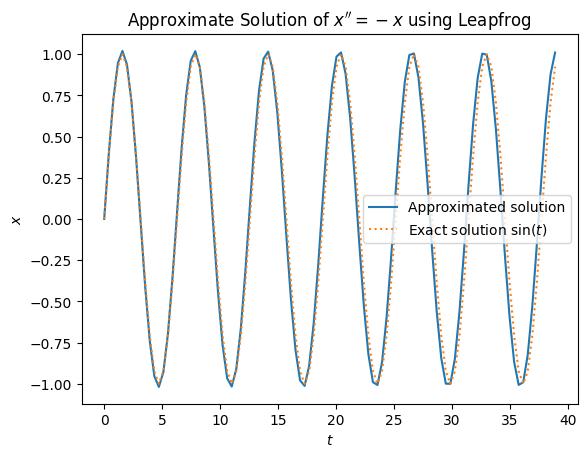

In [91]:
# NECESSARY IMPORTS

import numpy as np
import matplotlib.pyplot as plt

#================================================
# DEFINING f IN x" = f(x):

f = lambda x: -x

#================================================
# DEFINING THE INTEGRATOR'S PARAMETERS

n_steps = 100  # Number of approximation steps
Δt = 2*np.pi/N # Step size

x = np.empty(n_steps) # Array for positions
v = np.empty(n_steps) # Array for velocities

#================================================
# INITIAL CONDITIONS

x[0] = 0
v[0] = 1
a_new = f(x[0])

#================================================
# PERFORMING LEAPFROG INTEGRATION

for i in range(1, n_steps): # We start with index 1 because index 0 contains the initial conditions
    a_old = a_new
    x[i] = x[i-1] + v[i-1]*Δt + 0.5*a_old*Δt**2
    a_new = f(x[i])
    v[i] = v[i-1] + 0.5*(a_old + a_new)*Δt

#================================================
# PLOTTING THE RESULTS

# NOTE: x is calculated for discrete points of time t as per time steps Δt

t = np.arange(0, len(x)*Δt, Δt)
plt.plot(t, x, label='Approximated solution')
plt.plot(t, np.sin(t), linestyle='dotted', label='Exact solution $\sin(t)$')
plt.title('Approximate Solution of $x\'\' = -x$ using Leapfrog')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()
plt.show()

### Leapfrog integration for HMC
> **Reference**: [_Hamiltonian Monte Carlo from scratch_ from **colindcarroll.com**](https://colindcarroll.com/2019/04/11/hamiltonian-monte-carlo-from-scratch/)

Here, the leapfrom method shall be used to solve Hamiltonian equations.

---

To obtain the Hamiltonian equations, let us start with the Hamiltonian function (or simply the "Hamiltonian"):

$H(\theta, m) = K(\theta) + V(\theta) =$ _constant_

Here:

- $\theta$: Position
- $K(m)$: System's total kinetic energy (independent of positions)
- $V(\theta)$: System's total potential energy (independent of momenta)

---

Using the Hamiltonian, we write Hamilton's equations of motion:

Equation 1:

$\frac{d \theta}{dt} = \frac{\delta H}{\delta m} = \frac{\delta K}{\delta m} + \frac{\delta V}{\delta m} = \frac{\delta K}{\delta m}$ (because $\frac{\delta V}{\delta m} = 0$)

i.e.

$\frac{d \theta}{dt} = \frac{\delta K}{\delta m}$

Equation 2:

$\frac{dm}{dt} = - \frac{\delta H}{\delta \theta} = - \frac{\delta K}{\delta \theta} - \frac{\delta V}{\delta \theta} = - \frac{\delta V}{\delta \theta}$ (because $\frac{\delta K}{\delta \theta} = 0$)

i.e.

$\frac{dm}{dt} = - \frac{\delta V}{\delta \theta}$

**NOTE**: _We are using a mechanistic analogy which can be accurately extended to posterior sampling._

In [ ]:
def leapfrog(θ, m, dVdθ, T, Δt):
    '''
    Leapfrog integrator for Hamiltonian Monte Carlo
    ------------------------------------
    Parameters
    
    θ    : Array of initial positions
    m    : Array of initial momenta
    dVdθ : Callable that returns the gradient of the potential energy
    T    : Time duration indicating how long to integrate for
    Δt   : Time duration indicating how long each integration step should be

    ------------------------------------
    Returns
    
    θ, m : Arrays of new positions and momenta
    '''
    
    θ, m = np.copy(θ), np.copy(m)

    m -= Δt * dVdθ(θ) / 2  # half step
    for _ in range(int(T/Δt) - 1):
        θ += Δt * m  # whole step
        m -= Δt * dVdθ(θ)  # whole step
    θ += Δt * m  # whole step
    m -= Δt * dVdθ(θ) / 2  # half step

    # momentum flip at end
    return θ, -m

## HMC function

In [11]:
from autograd import grad
import autograd.numpy as np
import scipy.stats as st

def hamiltonian_monte_carlo(n_samples, negative_log_prob, initial_position, path_len=1, step_size=0.5):
    """Run Hamiltonian Monte Carlo sampling.

    Parameters
    ----------
    n_samples : int
        Number of samples to return
    negative_log_prob : callable
        The negative log probability to sample from
    initial_position : np.array
        A place to start sampling from.
    path_len : float
        How long each integration path is. Smaller is faster and more correlated.
    step_size : float
        How long each integration step is. Smaller is slower and more accurate.

    Returns
    -------
    np.array
        Array of length `n_samples`.
    """
    # autograd magic
    dVdq = grad(negative_log_prob)

    # collect all our samples in a list
    samples = [initial_position]

    # Keep a single object for momentum resampling
    momentum = st.norm(0, 1)

    # If initial_position is a 10d vector and n_samples is 100, we want
    # 100 x 10 momentum draws. We can do this in one call to momentum.rvs, and
    # iterate over rows
    size = (n_samples,) + initial_position.shape[:1]
    for p0 in momentum.rvs(size=size):
        # Integrate over our path to get a new position and momentum
        q_new, p_new = leapfrog(
            samples[-1],
            p0,
            dVdq,
            path_len=path_len,
            step_size=step_size,
        )

        # Check Metropolis acceptance criterion
        start_log_p = negative_log_prob(samples[-1]) - np.sum(momentum.logpdf(p0))
        new_log_p = negative_log_prob(q_new) - np.sum(momentum.logpdf(p_new))
        if np.log(np.random.rand()) < start_log_p - new_log_p:
            samples.append(q_new)
        else:
            samples.append(np.copy(samples[-1]))

    return np.array(samples[1:])